<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/TRAIN_AWS_P1_Lab_6_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #6: Review and K-Nearest Neighbors**
---

### **Description** 
In this lab, you will review what you have learned so far and implement KNNs (K-Nearest Neighbors) models. KNNs are a popular machine learning algorithm used for classification and regression tasks. Through this lab, you'll gain hands-on experience in building and training KNN models, and using them to make accurate predictions. You'll get to see firsthand how KNN models work, and how they can be used to solve real-world problems. 

<br>


### **Lab Structure**
**Part 0**:  [Review](#p0)

> **Part 0.1**: [Exploratory Data Analysis](#p01)

> **Part 0.2**: [Data Wrangling](#p02)

> **Part 0.3**: [Data Visualization](#p03)

**Part 1**:  [Breast Cancer Dataset](#p1)

**Part 2**: [Spotify Dataset](#p2)

**Part 3**: [[OPTIONAL] Wine Quality Dataset](#p3)


**Part 4**: [[OPTIONAL] Human Activity Recognition Dataset](#p4)

</br>


###**Goals**: 
By the end of this lab, you will:
* Gain hands-on experience in building and training KNN models using the scikit-learn library.
* Make three KNN models using sklearn and use these models to make predictions about new data.
* Apply KNN models for classification tasks.
* Evaluate the accuracy of KNN models using metrics such as confusion matrix.
* Apply KNN models to a real-world datasets.

</br> 

### **Cheat Sheets**

* [pandas Commands](https://docs.google.com/document/d/1v-MZCgoZJGRcK-69OOu5fYhm58x2G0JUWyi2H53j8Ls/edit)

* [Feature Engineering and Selection with pandas](https://docs.google.com/document/d/191CH-X6zf4lESuThrdIGH6ovzpHK6nb9NRlqSIl30Ig/edit?usp=sharing)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1EC3tTjRRL5ruNjc1n8UmJNGvN82_S-7rx7LLkMvv1Qk/edit?usp=share_link)

* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1fCZ1Gp9eM-Oxs_qb6cOiyPpwkqz155L0GMJl2oxQfXo/edit?usp=share_link)


**Run the code below before continuing:**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn import datasets, model_selection

<a name="p0"></a>

---
## **Part 0: Review**
---

In this part, you will review what you have learned so far about the steps before implementing ML models. Specifically, you will explore, wrangle, and visualize data from the 2021 Tokyo Olympics.

**Run the cell below to load the data for this section.**

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vReA41IIrQ-uu_-4aajKFaOClycejbWduf0BHHq9N7hy6-X6FAjq1X3JTn6L4zdr-PVm8Kg8XBiUKnk/pub?gid=1698215017&single=true&output=csv'

olympics_df = pd.read_csv(url)

<a name="p01"></a>

---
### **Part 0.1: Exploratory Data Analysis**
---

#### **Exercise #1**
---

Look at the first 3 rows of the dataset.

##### **Solution**

In [ ]:
olympics_df.head(3)

,Rank,Team/NOC,Gold medal,Silver_Medal,bronze_medal,Total,Rank by Total,NOCCode,Contineent
0,1,United States of America,39.0,41,33.0,113,1,USA,North America
1,2,People's Republic of China,38.0,32,18.0,88,2,CHN,Asia
2,3,Japan,27.0,14,17.0,58,5,JPN,Asia


#### **Exercise #2**
---

Determine basic information about the data such as the datatypes and number of non-null values in each column.

##### **Solution**

In [ ]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           97 non-null     int64  
 1   Team/NOC       97 non-null     object 
 2   Gold medal     96 non-null     float64
 3   Silver_Medal   97 non-null     int64  
 4   bronze_medal   96 non-null     float64
 5   Total          97 non-null     int64  
 6   Rank by Total  97 non-null     int64  
 7   NOCCode        97 non-null     object 
 8   Contineent     97 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 6.9+ KB


#### **Exercise #3**
---

Determine the key statistical information about the data.

##### **Solution**

In [ ]:
olympics_df.describe()

,Rank,Gold medal,Silver_Medal,bronze_medal,Total,Rank by Total
count,97.000000,96.000000,97.000000,96.000000,97.000000,97.000000
mean,45.329897,3.906250,3.649485,4.625000,12.144330,43.061856
std,26.327157,7.176098,6.516072,6.646329,19.369752,24.386563
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,23.000000,0.000000,1.000000,1.000000,2.000000,23.000000
50%,45.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,69.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


#### **Exercise #4**
---

Determine how many rows and columns there are in this dataset.

##### **Solution**

In [ ]:
olympics_df.shape

(97, 9)

#### **Exercise #5**
---

Print the data of the top 10 ranked countries. 

**Hint**: This data is ordered from highest to lowest rank.

##### **Solution**

In [ ]:
olympics_df.iloc[:10]

,Rank,Team/NOC,Gold medal,Silver_Medal,bronze_medal,Total,Rank by Total,NOCCode,Contineent
0,1,United States of America,39.0,41,33.0,113,1,USA,North America
1,2,People's Republic of China,38.0,32,18.0,88,2,CHN,Asia
2,3,Japan,27.0,14,17.0,58,5,JPN,Asia
3,4,Great Britain,22.0,21,22.0,65,4,GBR,Europe
4,5,ROC,20.0,28,23.0,71,3,ROC,Europe/Asia
5,6,Australia,17.0,7,22.0,46,6,AUS,Australia
6,7,Netherlands,10.0,12,14.0,36,9,NED,Europe
7,8,France,10.0,12,11.0,33,10,FRA,Europe
8,9,Germany,10.0,11,16.0,37,8,GER,Europe
9,10,Italy,10.0,10,20.0,40,7,ITA,Europe


#### **Exercise #6**
---

Print just the team names of the top 10 ranked countries.

##### **Solution 1**

In [ ]:
olympics_df.iloc[:10]['Team/NOC']

0      United States of America
1    People's Republic of China
2                         Japan
3                 Great Britain
4                           ROC
5                     Australia
6                   Netherlands
7                        France
8                       Germany
9                         Italy
Name: Team/NOC, dtype: object

##### **Solution 2**

In [ ]:
olympics_df['Team/NOC'].iloc[:10]

0      United States of America
1    People's Republic of China
2                         Japan
3                 Great Britain
4                           ROC
5                     Australia
6                   Netherlands
7                        France
8                       Germany
9                         Italy
Name: Team/NOC, dtype: object

<a name="p02"></a>

---
### **Part 0.2: Data Wrangling**
---

#### **Exercise #1**
---

Drop any duplicate rows.

##### **Solution**

In [ ]:
olympics_df.drop_duplicates(inplace = True)

#### **Exercise #2**
---

You should have seen from Exercise #2 in the section above that there are 2 columns, both numerical, with null values (look back at this Exercise if you did not notice this). We need to either impute by filling with the average or drop the rows with null values. 

Based on the meaning of these particular columns, decide which one makes more sense. In other words, is the average value of these columns a good value to guess for the missing rows or should we just drop them?

##### **Solution**

The columns with any null values are both the numbers of medals won by countries. There is very little relationship between the number that one country wins versus another and certainly the average does not reflect any relationship that does exist. So, we need to just drop these rows.

In [ ]:
olympics_df = olympics_df.dropna(axis = 0, how='any')

#### **Exercise #3**
---

This data currently has no consistent naming convention for columns, which is very bad practice. So, rename each column to be of the style, `'Column Name'`, where each word is separated by a space (not an underscore, slash, or anything else) and starts uppercase. Furthermore, make sure all words are spelled correctly.

<br>

**Hint**: It may make you life easier to quickly print the current column names here using the `.columns` attribute.

##### **Solution**

In [ ]:
renaming = {'Team/NOC': 'Team NOC', 'Gold medal': 'Gold Medal', 'Silver_Medal': 'Silver Medal', 'bronze_medal' : 'Bronze Medal', 'Rank by Total': 'Rank By Total', 'Contineent' : 'Continent'}
olympics_df = olympics_df.rename(columns = renaming)

olympics_df.columns

#### **Exercise #4**
---

All numeric values in this dataset should be whole numbers based on what they represent. So, make sure all numeric data has the type `int64`.

<br>

**Hint**: You can quickly check the data types of each column by using the `.dtypes` attribute.

##### **Solution**

In [ ]:
olympics_df = olympics_df.astype({'Gold Medal': 'int64', 'Bronze Medal': 'int64'})

olympics_df.dtypes

Rank              int64
Team NOC         object
Gold Medal        int64
Silver Medal      int64
Bronze Medal      int64
Total             int64
Rank By Total     int64
NOCCode          object
Continent        object
dtype: object

#### **Exercise #5**
---

Create a new feature called `Rank Category` that designates any country with a rank:
* 1 - 20 as `'top'`.
* 21 - 40 as `'high middle'`.
* 41 - 60 as `'low middle'`.
* 61 on as `'bottom'`.

##### **Solution**

In [ ]:
olympics_df.loc[olympics_df['Rank'] <= 20, 'Rank Category'] = 'top'
olympics_df.loc[(olympics_df['Rank'] > 20) & (olympics_df['Rank'] <= 40), 'Rank Category'] = 'high middle'
olympics_df.loc[(olympics_df['Rank'] > 40) & (olympics_df['Rank'] <= 60), 'Rank Category'] = 'low middle'
olympics_df.loc[olympics_df['Rank'] > 60, 'Rank Category'] = 'bottom'

olympics_df.head()

,Rank,Team NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total,NOCCode,Continent,Rank Category
0,1,United States of America,39,41,33,113,1,USA,North America,top
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia,top
2,3,Japan,27,14,17,58,5,JPN,Asia,top
3,4,Great Britain,22,21,22,65,4,GBR,Europe,top
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia,top


#### **Exercise #6**
---

Now encode this feature, `Rank Category`, from 0 to 3 and call it `Rank Category Numerical`.

##### **Solution**

In [ ]:
rank_map = {'top': 0, 'high middle': 1, 'low middle': 2, 'bottom': 3}

olympics_df['Rank Category Numerical'] = olympics_df['Rank Category'].map(rank_map)

#### **Exercise #7**
---

Complete the code below to select the top 3 numerical features to predict the label `Rank Category Numerical`.

In [ ]:
# Organize into numerical features and label
features = olympics_df.select_dtypes(# COMPLETE THIS LINE
features = features.drop('Rank Category Numerical', axis = 1)
label = # COMPLETE THIS LINE

# Select k best features
feature_selector = SelectKBest(# COMPLETE THIS LINE
feature_selector.fit_transform(features, label)
best_features = olympics_df[feature_selector.get_feature_names_out()]

# Look at resulting DataFrame
best_features.head()

##### **Solution**

In [ ]:
# Organize into numerical features and label
features = olympics_df.select_dtypes('number')
features = features.drop('Rank Category Numerical', axis = 1)
label = olympics_df['Rank Category Numerical']

# Select k best features
feature_selector = SelectKBest(k = 3)
feature_selector.fit_transform(features, label)
best_features = olympics_df[feature_selector.get_feature_names_out()]

# Look at resulting DataFrame
best_features.head()

,Rank,Bronze Medal,Rank By Total
0,1,33,1
1,2,18,2
2,3,17,5
3,4,22,4
4,5,23,3


#### **Exercise #8**
---

As you likely saw above, one of the best features is `Rank`, which we used to create `Rank Category Numerical` in the first place. Using such a feature is not good practice generally since we probably would not have access to the `Rank` were we trying to predict the `Rank Category Numerical`.

So, alter your solution from above to drop the label *and* 'Rank' when defining the features.

In [ ]:
# Organize into numerical features and label
features = olympics_df.select_dtypes(# COMPLETE THIS LINE
features = features.drop('Rank Category Numerical', axis = 1)
label = # COMPLETE THIS LINE

# Select k best features
feature_selector = SelectKBest(# COMPLETE THIS LINE
feature_selector.fit_transform(features, label)
best_features = olympics_df[feature_selector.get_feature_names_out()]

# Look at resulting DataFrame
best_features.head()

##### **Solution**

In [ ]:
# Organize into numerical features and label
features = olympics_df.select_dtypes('number')
features = features.drop(['Rank', 'Rank Category Numerical'], axis = 1)
label = olympics_df['Rank Category Numerical']

# Select k best features
feature_selector = SelectKBest(k = 3)
feature_selector.fit_transform(features, label)
best_features = olympics_df[feature_selector.get_feature_names_out()]

# Look at resulting DataFrame
best_features.head()

,Bronze Medal,Total,Rank By Total
0,33,113,1
1,18,88,2
2,17,58,5
3,22,65,4
4,23,71,3


<a name="p03"></a>

---
### **Part 0.3: Data Visualization**
---

#### **Exercise #1**
---

Create a scatter plot with `Gold Medal` as the x variable and `Rank` as the y variable. Make sure to include a meaningful:
* Title.
* X-label.
* Y-label.

##### **Solution**

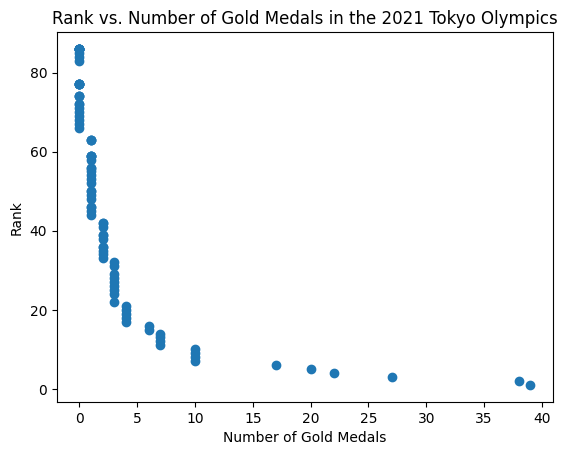

In [ ]:
plt.scatter(olympics_df['Gold Medal'], olympics_df['Rank'])

plt.title('Rank vs. Number of Gold Medals in the 2021 Tokyo Olympics')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Rank')

plt.show()

#### **Exercise #2**
---

Alter your solution from above so that the data points are orange.

##### **Solution**

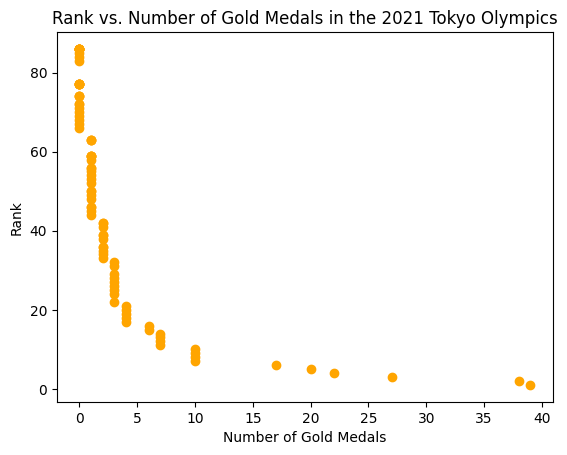

In [ ]:
plt.scatter(olympics_df['Gold Medal'], olympics_df['Rank'], color = 'orange')

plt.title('Rank vs. Number of Gold Medals in the 2021 Tokyo Olympics')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Rank')

plt.show()

#### **Exercise #3**
---

Now add another scatter plot in the one above for `Bronze Medal` vs. `Rank` with blue markers in the shape of an x (`x`).

##### **Solution**

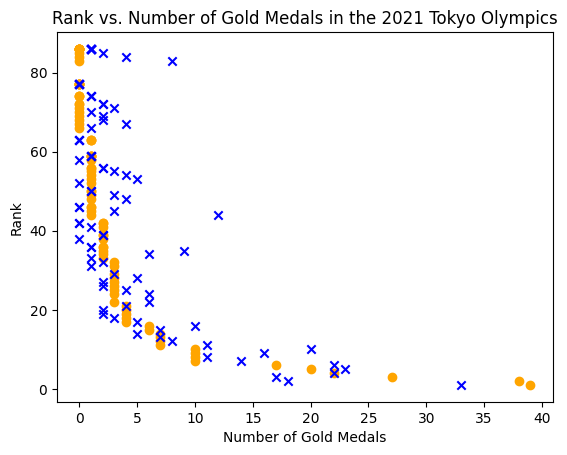

In [ ]:
plt.scatter(olympics_df['Gold Medal'], olympics_df['Rank'], color = 'orange')
plt.scatter(olympics_df['Bronze Medal'], olympics_df['Rank'], color = 'blue', marker = 'x')

plt.title('Rank vs. Number of Gold Medals in the 2021 Tokyo Olympics')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Rank')

plt.show()

#### **Exercise #4**
---

Complete the plot above such that there is a legend labeling the gold and bronze medals.

##### **Solution**

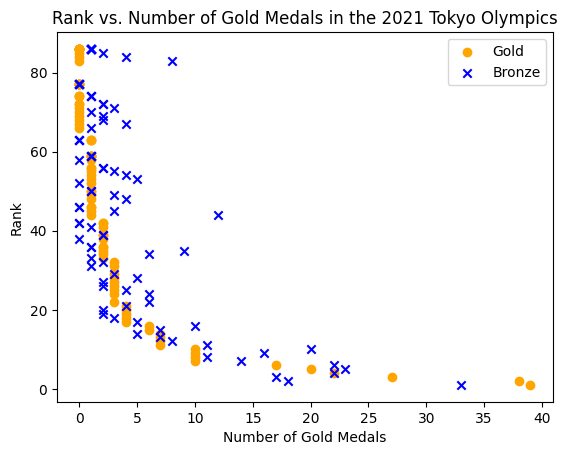

In [ ]:
plt.scatter(olympics_df['Gold Medal'], olympics_df['Rank'], color = 'orange', label = 'Gold')
plt.scatter(olympics_df['Bronze Medal'], olympics_df['Rank'], color = 'blue', marker = 'x', label = 'Bronze')

plt.title('Rank vs. Number of Gold Medals in the 2021 Tokyo Olympics')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Rank')
plt.legend()

plt.show()

#### **Exercise #5**
---

Create a scatter plot with `Rank` as the x variable and `Rank By Total` (where the number of medals, regardless of type are ranked) as the y variable. Make sure to include a meaningful:
* Title.
* X-label.
* Y-label.

##### **Solution**

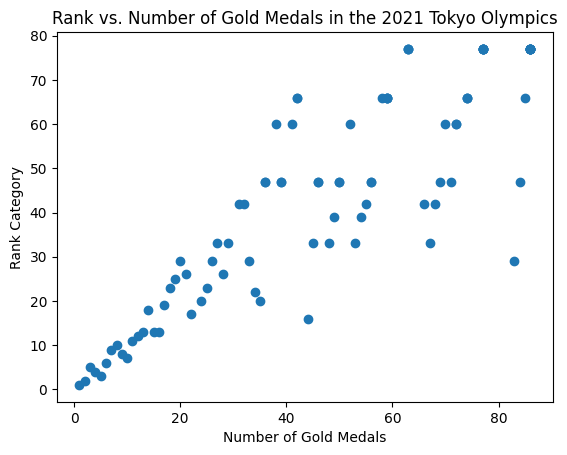

In [ ]:
plt.scatter(olympics_df['Rank'], olympics_df['Rank By Total'])

plt.title('Rank By Total vs. Rank in the 2021 Tokyo Olympics')
plt.xlabel('Rank')
plt.ylabel('Rank By Total')

plt.show()

#### **Exercise #6**
---

Create a line plot with `Gold Medal` as the x variable and `Rank Category Numerical` as the y variable. Make sure to include a meaningful:
* Title.
* X-label.
* Y-label.

##### **Solution**

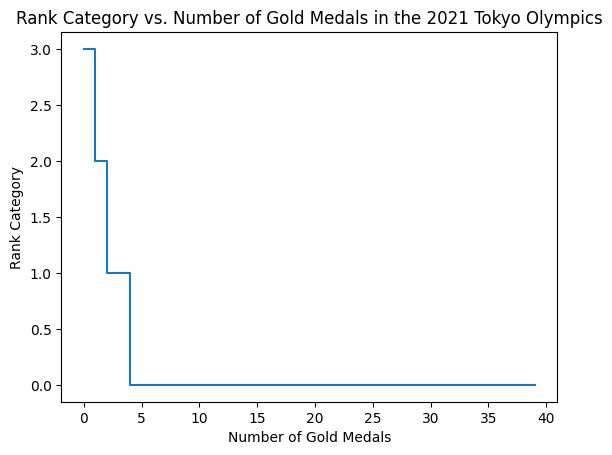

In [ ]:
plt.plot(olympics_df['Gold Medal'], olympics_df['Rank Category Numerical'])

plt.title('Rank Category vs. Number of Gold Medals in the 2021 Tokyo Olympics')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Rank Category')

plt.show()

#### **Exercise #7**
---

Create a bar plot with `Team NOC` as the x variable and `Total` as the y variable. Make sure to include a meaningful:
* Title.
* X-label.
* Y-label.

##### **Solution**

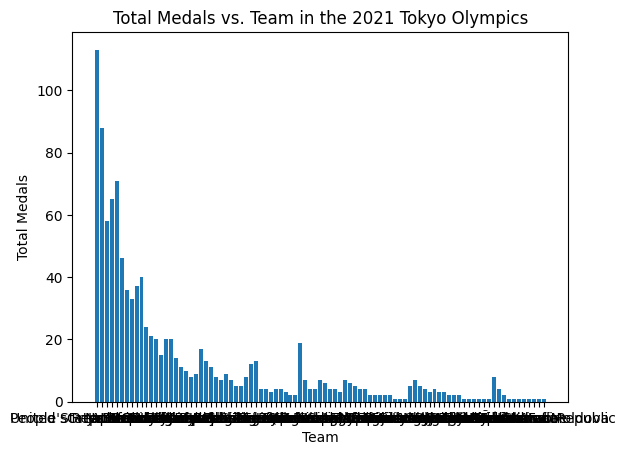

In [ ]:
plt.bar(olympics_df['Team NOC'], olympics_df['Total'])

plt.title('Total Medals vs. Team in the 2021 Tokyo Olympics')
plt.xlabel('Team')
plt.ylabel('Total Medals')

plt.show()

#### **Exercise #8**
---

Notice that there are too many countries to fit into this space. One way to deal with this is to plot a subset of the data. So, create a bar plot with `Team NOC` as the x variable and `Total` as the y variable. *But, only plot the top 10 countries*. Make sure to include a meaningful:
* Title.
* X-label.
* Y-label.

<br>

**NOTE**: The country names will still probably overlap. To fix this, add the line `plt.xticks(rotation = 90)` anywhere before `plt.show()`.

##### **Solution**

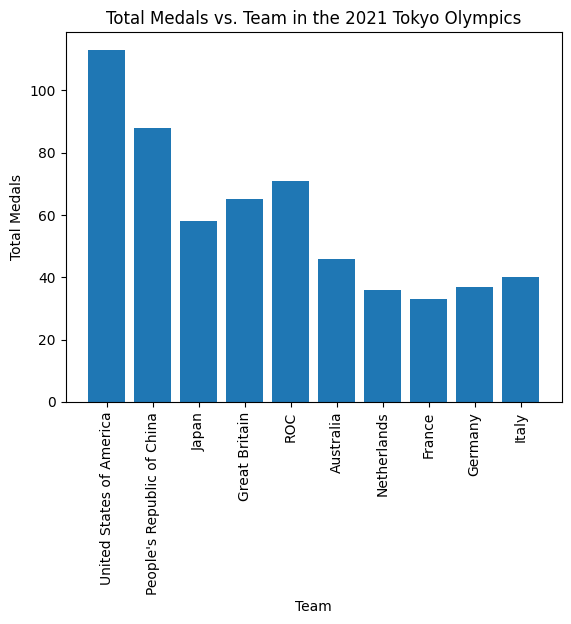

In [ ]:
plt.bar(olympics_df['Team NOC'][:10], olympics_df['Total'][:10])

plt.title('Total Medals vs. Team in the 2021 Tokyo Olympics')
plt.xlabel('Team')
plt.ylabel('Total Medals')
plt.xticks(rotation = 90)

plt.show()

<a name="p1"></a>

---
## **Part 1: Breast Cancer Dataset [Practice Together]**
---
The following dataset is taken from the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset contains mammography exam results and whether or not cancer was detected.

In Part 1, we will create a KNN classifier that will be used to predict whether or not a patient has breast cancer.

### **Step #1: Load the data**
---

Use the following code to load the breast cancer dataset.


In [ ]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['TARGET'] = cancer_dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### **Step #2: Decide independent and dependent variables**
---

To simplify our KNN fitting, we will fit our classifier using the `"mean radius"` and `"mean texture"` features in order to predict whether the patient has breast cancer.

In [ ]:
# Slice our dataset to view the features we care about
df[["mean radius","mean texture", "TARGET"]]

,mean radius,mean texture,TARGET
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


**Before we continue our steps, let's visualize our data.**

Since we are building a classifier, it can be useful to look at some of the variables. Below we will look at `"mean radius"` and  `"mean texture"` and see if there appears to be a correlation with the detection of cancer.

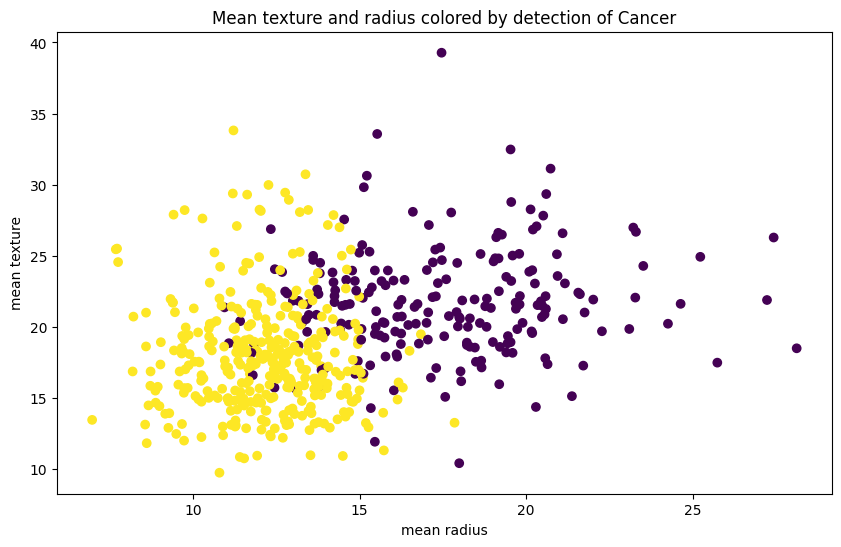

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["mean radius"], df["mean texture"], c=df["TARGET"])
plt.title("Mean texture and radius colored by detection of Cancer")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

### **Step #3: Split data into training and testing data**
---


#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["mean radius","mean texture"]],
                                                                    df[["TARGET"]], test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**
---

#### **Solution**

In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize the model and set hyperparameters**
---


Remember to set the *hyperparameter* to `n_neighbors = 4`.

#### **Solution**

In [ ]:
# initialize
model = KNeighborsClassifier(n_neighbors = 4)

### **Step #6: Fit your model and make a prediction. Create a visualization if applicable.**
---

#### **Solution**

In [ ]:
# fit
model.fit(X_train.values, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# predict
pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


**Create a visualization**

We can now use a colormesh plot to show the decision boundary of the KNN model. *This code has been provided*.


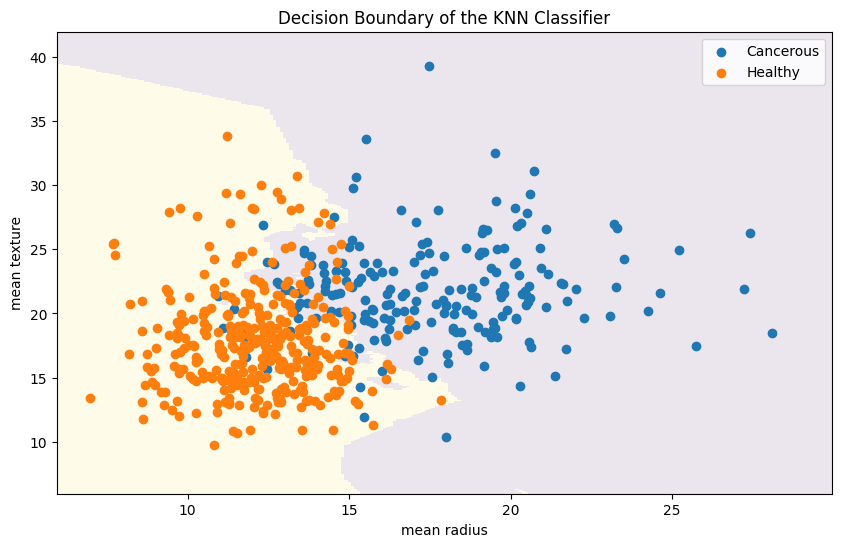

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(6, 30, 0.1),
                     np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('TARGET'):
  ax.scatter(data["mean radius"], data["mean texture"], label=["Cancerous","Healthy"][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### **Step #7: Evaluate your model**
---

Test the accuracy of your model.

#### **Solution**

In [ ]:
# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.plot_confusion_matrix(model, X_test.values, y_test.values)

Accuracy Score:  0.9035087719298246


AttributeError: ignored

### **Step #8: Use the model**
---

Predict whether the following patients have cancer or not:

1. Is a patient with mean radius `15.5` and mean texture `31.2` likely to have cancer?
2. Is a patient with mean radius `12.2` and mean texture `34.5` likely to have cancer?



#### **Solution**

In [ ]:
patient1 = pd.DataFrame([[15.5, 31.2]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient1.values)[0]
print(f"Patient 1 {['is likely', 'is not likely'][prediction]} to have cancer")

patient2 = pd.DataFrame([[12.2, 34.5]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient2.values)[0]
print(f"Patient 2 {['is likely', 'is not likely'][prediction]} have cancer")

Patient 1 is likely to have cancer
Patient 2 is not likely have cancer


### **[Optional]: Hyperparameter Tuning**
---

Run the given code below to find the optimal k for our model. What is this k?

{1: 92.98245614035088, 2: 92.98245614035088, 3: 92.98245614035088, 4: 93.85964912280701, 5: 95.6140350877193, 6: 96.49122807017544, 7: 95.6140350877193, 8: 95.6140350877193, 9: 95.6140350877193}


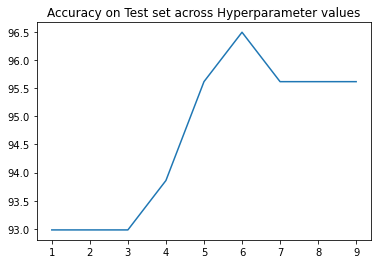

Top score of optimal classifier: 96.49%
Best Value of N to use: 6


In [ ]:
# Now lets see how accurate it is looking at all 30 variables

# Load all columns of the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                      df.drop("TARGET", axis=1), df[["TARGET"]],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,10):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score
    

plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

top_score = max(scores.values())
print(f"Top score of optimal classifier: {top_score:.2f}%")
best_n = list(scores.keys())[list(scores.values()).index(top_score)]
print(f"Best Value of N to use: {best_n}")

<a name="p2"></a>

---
## **Part 2: Spotify Dataset**
---

The following dataset from Spotify data looks at different qualities of songs like energy, key, loudness, and tempo to see if a song is a top or bottom hit.

Create a KNN model to predict whether a song will be a hit or a bust.

### **Step #1: Load the data**
---

Use the following code to load the dataset.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQJ9UIsI2j8vPnefdBj6GIrUGiDMsF5HRVAg4rsfaZqX5fAoTGLGydLvPXPQvE5ZSo9_aet1SC5UQji/pub?gid=1132556054&single=true&output=csv"
spotify_df = pd.read_csv(url)

spotify_df.head()

,artist,song,duration_ms,year,top half,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit,explicity binary
0,Britney Spears,Oops!...I Did It Again,211160,2000,1,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,False,0
1,blink-182,All The Small Things,167066,1999,1,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",False,0
2,Faith Hill,Breathe,250546,1999,1,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",False,0
3,Bon Jovi,It's My Life,224493,2000,1,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",False,0
4,*NSYNC,Bye Bye Bye,200560,2000,1,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,False,0


### **Step #2: Decide independent and dependent variables**
---

For this problem, we are interested in how the `key` and `energy` affect whether or not a song becomes a hit. Use the following code to create a visual of these variables.

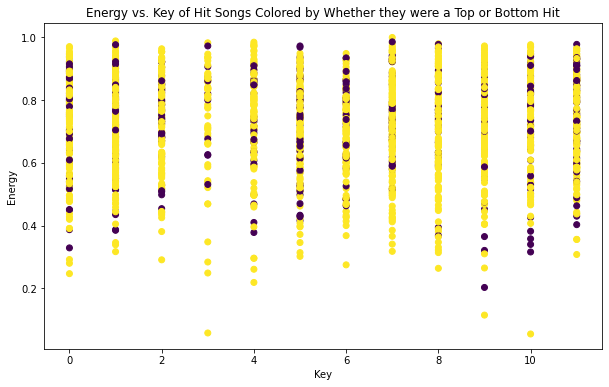

In [ ]:
key = spotify_df["key"]
energy = spotify_df["energy"]
top_half = spotify_df["top half"]

plt.figure(figsize=(10,6))
plt.scatter(key, energy, c = top_half)

plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

### **Step #3: Split data into training and testing data**
---

Split the data as described above

#### **Solution**

In [ ]:
inputs = spotify_df[["key", "energy"]]
output = spotify_df["top half"]


X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**
---
 

#### **Solution**

In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize the model and set hyperparameters**
---

Remember to set the *hyperparameter* to `n_neighbors = 3`.

#### **Solution**

In [ ]:
# initialize
model = KNeighborsClassifier(n_neighbors = 3)

### **Step #6: Fit your model and make a prediction. Create a visualization if applicable.**
---

In [ ]:
# fit
model.fit(X_train, y_train)
# predict
pred = model.predict(X_test)

**Create a graph in a similar style to the graph from Step #2. Use your prediction for the color (`c = pred`) and your testing data (`key = X_test["key"]` and `energy = X_test["energy"]`).**

#### **Solution**


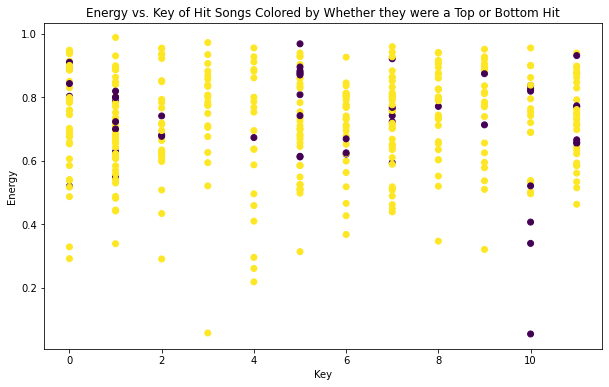

In [ ]:
# predict
pred = model.predict(X_test)

key = X_test["key"]
energy = X_test["energy"]


# visualize these predictions
plt.figure(figsize=(10,6))
plt.scatter(key, energy, c = pred)

plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

### **Step #7: Evaluate your model**
---

Display the `accuracy_score` and `plot_confusion_matrix`.

#### **Solution**

Accuracy Score:  0.7175


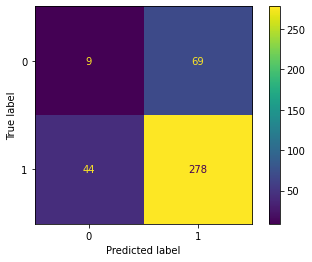

In [ ]:
# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.plot_confusion_matrix(model, X_test, y_test)

### **Step #8: Use the model**
---

Use your model to predict whether the following songs are in the top hits.

1. We are given an song with `key = 3` and `energy = 0.8`. According to your KNN model, will this song be in the top half of hits?
2. We are given another song with `key = 10` and `energy = 0.2`. Will this song be a bust or a hit?
3. We are given an song with `key = 1` and `energy = 0.5`. Will this song be a bust or a hit?

#### **Solution**

In [ ]:
# 1 yes
song = pd.DataFrame([[3, 0.8]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

# 2 no
song = pd.DataFrame([[10, 0.2]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

# 3 yes
song = pd.DataFrame([[1, 0.5]], columns = ["key", "energy"])

prediction = model.predict(song)

print(prediction)

[1]
[0]
[1]


<a name="p3"></a>

---
## [OPTIONAL] **Part 3: Wine Dataset**
---
We've already explored this dataset; now it's time to create a KNN model using it! The following dataset is taken from the [UCI ML Wine Recognition](https://archive.ics.uci.edu/ml/datasets/wine) dataset and contains the results of a chemical analysis of wines grown in the same region in Italy by three different cultivars (grape types). Create a new column `TARGET` out of the target for the `load_wine()` data. 

Your goal is to build a model that can predict which cultivar (grape type) the wine originated from.


### **Step #1: Load the data**
---

Use the following code to load the wine dataset.
```
wine_dataset = datasets.load_wine()
df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
df['TARGET'] = wine_dataset.target
df
```

In [ ]:
wine_dataset = datasets.load_wine()
df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
df['TARGET'] = wine_dataset.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### **Step #2: Decide independent and dependent variables**
---

Use `.var()` and `.corr()` to choose your independent variables that help predict the `TARGET` correctly.

#### **Solution**

In [ ]:
df.var()

alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
TARGET                              0.600679
dtype: float64

In [ ]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
# we will use
df[["malic_acid","color_intensity", "TARGET"]]

,malic_acid,color_intensity,TARGET
0,1.71,5.64,0
1,1.78,4.38,0
2,2.36,5.68,0
3,1.95,7.80,0
4,2.59,4.32,0
...,...,...,...
173,5.65,7.70,2
174,3.91,7.30,2
175,4.28,10.20,2
176,2.59,9.30,2


### **Visualize our data before creating our model**
---

Choose two of your independent variables and graph them on a scatter plot.

Be sure to set the `c` value to the target to color the dots by target class.
```
plt.scatter(x, y, c=df["TARGET"]
```

#### **Solution**

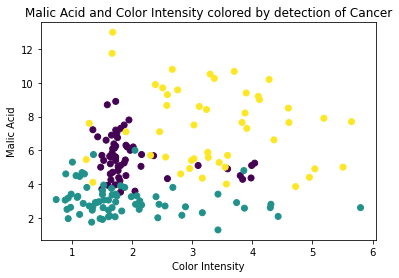

In [ ]:
plt.scatter(df["malic_acid"], df["color_intensity"], c=df["TARGET"])
plt.title("Malic Acid and Color Intensity colored by detection of Cancer")
plt.xlabel("Color Intensity")
plt.ylabel("Malic Acid")
plt.show()

### **Steps #3-6: Split data, import the algorithm, initialize the model, fit the model, and make a prediction with the testing data**
---

Set the *hyperparameter* `n_neighbors = 3`. You can skip creating a visualization for now, but if you have time you can go back and try to create one.



#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["malic_acid","color_intensity"]],
                                                                    df[["TARGET"]], test_size=0.2, random_state=42)
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# initialize
model = KNeighborsClassifier(n_neighbors = 3)
# fit
model.fit(X_train, y_train.values.ravel())
# predict
pred = model.predict(X_test)

### **Step #7: Evaluate your model**
---

Display the `accuracy_score` and `plot_confusion_matrix`.

#### **Solution**

Accuracy Score:  0.8611111111111112


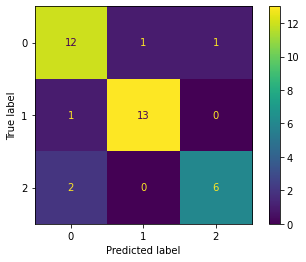

In [ ]:
# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.plot_confusion_matrix(model, X_test, y_test)

### **Step #8: Use the model**
---

Who is likely to have cultivated a wine with `malic_acid = 4.1` and `color_intensity = 1.1` ?


#### **Solution**

In [ ]:
unknown_wine = pd.DataFrame([[4.1, 1.1]], columns=["malic_acid", "color_intensity"])
prediction = model.predict(unknown_wine)[0]
print(f"Wine is likely from {['cultivator 1', 'cultivator 2', 'cultivator 3'][prediction]} ")

Wine is likely from cultivator 2 


# End of Lab

---
© 2023 The Coding School, All rights reserved